[![Abra no Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ffserro/MVP/blob/master/mvp.ipynb)


# Regressão Linear para Series Temporais - Planejamento dos dispêndios de alimentação de militares da Marinha do Brasil

## Contextualização



### O que é o municiamento?
A Gestoria de Munciamento é o conjunto dos processos responsáveis por gerir diariamente a alimentação e subsistência dos militares e servidores lotados nas organizações militares da Marinha do Brasil.

As principais atividades da gestoria de municiamento são:
- Planejamento e aquisição de gêneros alimentícios
- Controle de estoque de gêneros alimentícios
- Escrituração e pagamento
- Prestação de contas


### Orçamento público e alimentação de militares
Por ser custeada com recursos do orçamento da União, a gestoria de municiamento se submete a um sistema rigoroso de planejamento, controle, fiscalização e transparência, para garantir que os valores sejam utilizados de forma eficiente, econômica e legal.

A compra de gêneros alimentícios é uma despesa recorrente e significativa. Uma gestão eficiente garante que os recursos financeiros sejam alocados de forma inteligente, evitando gastos desnecessários.

Uma boa gestão de estoques minimiza desperdícios de alimentos por validade ou má conservação.

Como em qualquer gasto público, a aquisição de suprimentos deve ser transparente e seguir todas as normas de controle, visando a economia e a responsabilidade fiscal.

<div align="justify">
O planejamento eficiente dos recursos logísticos é um dos pilares para a manutenção da prontidão e da capacidade operacional das Forças Armadas. Entre os diversos insumos estratégicos, a alimentação das organizações militares desempenha papel central, tanto no aspecto orçamentário quanto no suporte direto às atividades diárias. Na Marinha do Brasil, a gestão dos estoques e dos gastos com gêneros alimentícios envolve múltiplos órgãos e abrange um volume expressivo de transações financeiras e contábeis, tornando-se um processo complexo e suscetível a variações sazonais, econômicas e administrativas.

Neste cenário, prever com maior precisão os custos relacionados ao consumo de alimentos é fundamental para otimizar a alocação de recursos públicos, reduzir desperdícios, evitar rupturas de estoque e aumentar a eficiência do planejamento orçamentário. Tradicionalmente, esse processo é conduzido por meio de análises históricas e técnicas de planejamento administrativo. No entanto, tais abordagens muitas vezes não capturam adequadamente os padrões temporais e as variáveis externas que influenciam os gastos.

A ciência de dados, e em particular as técnicas de modelagem de séries temporais, surge como uma alternativa poderosa para aprimorar esse processo decisório. Modelos como SARIMA, Prophet, XGBoost e LSTM permitem identificar tendências, sazonalidades e anomalias nos dados, possibilitando não apenas previsões mais robustas, mas também a geração de insights que subsidiam políticas de abastecimento e aquisição.

Assim, o presente trabalho propõe a aplicação de técnicas de análise e previsão de séries temporais sobre os dados históricos de consumo de alimentos da Marinha do Brasil, com o objetivo de estimar os custos futuros e explorar padrões relevantes que possam apoiar o processo de gestão logística e orçamentária. A relevância deste estudo reside não apenas no ganho potencial de eficiência administrativa, mas também na contribuição para a transparência, a racionalização do gasto público e a modernização da gestão de suprimentos em instituições estratégicas para o país.
</div>

## Glossário


* Municiamento
* Rancho
* Etapa
* Comensal
* Série Temporal
* Tendência
* Sazonalidade
* Estacionariedade


## Modelagem

<div align="justify">
 O conjunto de dados que será apresentado traz informações sobre despesas mensais com alimentação de militares e servidores de grandes organizações.

 O balanço de paiol do mês anterior nos traz a informação valor total dos gêneros alimentícios armazenados na organização no último dia do mês anterior.

 Os gêneros podem ser adquiridos pelas organizações de quatro formas diferentes:
 - adquirindo os gêneros dos depósitos de subsistência da Marinha
 - adquirindo os gêneros através de listas de fornecimento de gêneros, que são licitações centralizadas realizadas para atender toda a Marinha
 - adquirindo os gêneros através da realização de licitações próprias
 - adquirindo os gêneros através de contratação direta, sem licitação

 As organizações podem transferir gêneros entre seus estoques, através da realização de remessas. Os gêneros são contabilizados então no paiol através de remessas recebidas e remesas expedidas.

 Os gêneros consumidos durante as refeições do dia (café da manhã, almoço, janta e ceia) são contabilizados como gêneros consumidos.

 Os gêneros consumidos fora das refeições, como o biscoito, café e açúcar que são consumidos durante o dia, são contabilizados como vales-extra.

 As eventuais perdas de estoque são contabilizadas como termos de despesa.

 Quanto às receitas, cada comensal lotado na organização autoriza um determinado valor despesa por dia. A soma dessa despesa autorizada no mês é o valor limite dos gêneros que poderão ser retirados do paiol.

 A modelagem para os dispêndios com gêneros alimentícios considera as seguintes variáveis:
 - a quantidade de pessoas às quais é oferecida alimentação
 - o custo dos alimentos em paiol
 - a composição do cardápio (englobando o perfil de consumo de cada organização)

 Assim, o gasto mensal $Y_m$ de determinada organização no mês $m$ pode ser expresso em termos de:
 - Efetivo atendido ($N_m$)
 - Custo de aquisição dos insumos ($P_m$)
 - Composição do cardápio e perfil de consumo ($C_m$)

 Ou seja, $Y_m = f(N_m, P_m, C_m)\ +\ ϵ_m$

 sendo que o gasto mensal $Y_m$ é o somatório dos gastos diários $Y_d$, expressos por:

\begin{align}
\mathbf{Y_d} = \sum_{i=1}^q \ N_i \cdot p_i \\ \\ \mathbf{Y_m} = \sum_{i=1}^{30} Y_{di}
\end{align}


</div>

## Trabalho

In [1]:
#@title Downloads necessários

# SE é a primeira vez que esta célula está sendo executada na sessão ENTÃO baixe os arquivos hospedados no github E instale as dependências do projeto.
![ ! -f '/content/pip_log.txt' ] && git clone 'https://github.com/ffserro/MVP.git' && pip install -r '/content/MVP/requirements.txt' > '/content/pip_log.txt'

In [88]:
#@title Import de bibliotecas
from glob import glob

from datetime import datetime as dt, timedelta as td

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from geopy.geocoders import Nominatim

from prophet import Prophet
from xgboost import XGBRegressor

from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS

from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
#@title Leitura dos dados brutos
mmm = pd.DataFrame()
mmm = pd.concat([mmm] + [pd.read_excel(arquivo, parse_dates=[['ano', 'mes']]) for arquivo in glob('/content/MVP/dados/mmm/*.xlsx')])

etapas = pd.DataFrame()
etapas = pd.concat([etapas] + [pd.read_excel(arquivo, parse_dates=[['ano', 'mes']]) for arquivo in glob('/content/MVP/dados/etapas/*.xlsx')])

centralizadas = pd.read_csv('/content/MVP/dados/om_centralizada.csv')

om_info = pd.read_csv('/content/MVP/dados/om_info.csv')

### Limpeza dos dados

#### Limpeza do conjunto de dados sobre os Mapas Mensais do Municiamento de 2019 a 2025

In [4]:
mmm.groupby('nome').ano_mes.count().sort_values(ascending=False)

,ano_mes
nome,
1° BATALHAO DE OPERAÇOES LITORANEAS DE FUZILEIROS NAVAIS,80
1º Batalhão de Operações Ribeirinhas,80
2° BATALHÃO DE OPERAÇÕES LITORÂNEAS DE FUZILEIROS NAVAIS,80
3° BATALHÃO DE OPERAÇÕES LITORÂNEAS DE FUZILEIROS NAVAIS,80
BASE DE ABASTECIMENTO DA MARINHA NO RIO DE JANEIRO,80
...,...
TREINA31,2
TREINA34,2
Aviso de Apoio Costeiro Almirante Hess,1


In [5]:
# Ao todo o conjunto de dados contempla 80 meses. Como será realizada uma análise de série temporal, vou considerar apenas as organizações que possuem dados para todo o período.
mmm = mmm[mmm.codigo.isin(mmm.codigo.value_counts()[mmm.codigo.value_counts() == 80].index)]

In [6]:
mmm = mmm[mmm.ano_mes < dt(2025, 7, 1)]

#### Limpeza do conjunto de dados sobre informações das OM

In [7]:
# Dados faltosos
(om_info.isna().sum()/len(om_info)).sort_values(ascending=False)

,0
COMIMSUP,1.000000
ODS,0.500907
TELEFONE,0.377495
BAIRRO,0.183303
CEP,0.147005
ENDERECO,0.136116
UF,0.136116
CIDADE,0.125227
CNPJ,0.030853
AREA_ID,0.014519


In [8]:
om_info.nunique()

,0
DN_ID,9
AREA_ID,10
ID,551
CODIGO,550
NOME,550
TIPO,7
INDICATIVO_NAVAL,499
SIGLA,550
COMIMSUP,0
ODS,17


In [9]:
# Informações que não vao agregar conhecimento para o caso em tela, por serem nulos ou por conter informações irrelevantes
om_info.drop(columns=['COMIMSUP', 'CNPJ', 'TELEFONE', 'ODS', 'TIPO_CONEXAO', 'CRIACAO', 'MODIFICACAO'], inplace=True)

In [10]:
om_info[['DN_ID', 'SUB_DN_ID', 'AREA_ID', 'COD_SQ_LOCAL', 'NOME', 'CIDADE']].sort_values(by=['DN_ID', 'SUB_DN_ID', 'AREA_ID', 'COD_SQ_LOCAL'])

,DN_ID,SUB_DN_ID,AREA_ID,COD_SQ_LOCAL,NOME,CIDADE
71,1.0,1.0,2.0,0.0,CENTRO DE APOIO A SISTEMAS LOGÍSTICOS DE DEFESA,RIO DE JANEIRO
413,1.0,1.0,2.0,2.0,NAVIO-PATRULHA GUAÍBA,NATAL
163,1.0,1.0,2.0,3.0,SUBMARINO TAMOIO,RIO DE JANEIRO
311,1.0,1.0,2.0,9.0,NAVIO-PATRULHA GUARATUBA,Salvador
168,1.0,1.0,2.0,12.0,COMANDO DA DIVISÃO RIBEIRINHA,DUQUE DE CAXIAS
...,...,...,...,...,...,...
321,9.0,36.0,30.0,409.0,POLICLÍNICA NAVAL DE MANAUS,MANAUS
332,9.0,36.0,30.0,711.0,NAVIO DE ASSISTÊNCIA HOSPITALAR SOARES DE MEIR...,MANAUS
345,NaN,NaN,NaN,1.0,ADIDO DE DEFESA E NAVAL EM PORTUGAL,LISBOA
134,NaN,NaN,NaN,500.0,CENTRO DE INSTRUÇÃO ALMIRANTE GASTÃO MOTTA,NaN


In [11]:
# As colunas SUB_DN_ID, AREA_ID e COD_SQ_LOCAL são pouco ou não descritivas
om_info.drop(columns=['SUB_DN_ID', 'AREA_ID', 'COD_SQ_LOCAL'], inplace=True)

In [12]:
om_info.sort_values(by='TIPO')

,DN_ID,ID,CODIGO,NOME,TIPO,INDICATIVO_NAVAL,SIGLA,ENDERECO,BAIRRO,CIDADE,UF,CEP
19,6.0,10092,86010,1º ESQUADRÃO DE HELICÓPTEROS DE EMPREGO GERAL ...,A,HELIEQ,EsqdHu-61,"RUA 14 DE MARÇO, S/No.",CENTRO,LADÁRIO,MS,79370000
144,9.0,10258,88010,1º ESQUADRÃO DE HELICÓPTEROS DE EMPREGO GERAL ...,A,HELIET,EsqdHU-91,"RUA RIO ITAQUAÍ, S/Nº",VILA BURITI,MANAUS,AM,69072080
11,1.0,10074,91140,1º ESQUADRÃO DE HELICÓPTEROS DE ESCLARECIMENTO...,A,HELITQ,EsqdHA-1,RUA COMANDANTE ITURIEL S/Nº,FLUMINENSE,SÃO PEDRO DA ALDEIA,RJ,28940000
178,1.0,10036,91120,1º ESQUADRÃO DE HELICÓPTEROS DE EMPREGO GERAL,A,HELIEU,EsqdHU-1,"RUA COMANDANTE ITURIEL, S/Nº",FLUMINENSE,SÃO PEDRO DA ALDEIA,RJ,28940000
512,1.0,13879,91170,Grupo Aéreo Naval de Manutenção,A,GANMNT,GAerNavMan,RUA COMANDANTE ITURIEL - S/Nº - - FLUMINENSE -...,Base Aero Naval,São Pedro da Aldeia,RJ,28944-05
...,...,...,...,...,...,...,...,...,...,...,...,...
216,1.0,10391,71260,DEPÓSITO DE FARDAMENTO DA MARINHA NO RIO DE JA...,T,DPFARD,DepFMRJ,"AV.BRASIL, 10500",OLARIA,RIO DE JANEIRO,RJ,21012350
353,1.0,10309,91181,CENTRO DE INTENDÊNCIA DA MARINHA EM SÃO PEDRO ...,T,CITSPA,CeIMSPA,RUA COMANDANTE ITURIEL S/N,FLUMINENSE,S.PEDRO ALDEIA,RJ,28940000
550,1.0,14819,18000,Secretaria Naval de Segurança Nuclear e Qualidade,T,SEGNUC,SecNSNQ,"Rua da Ponte, s/nº, Edifício 23",Centro,Rio de Janeiro,RJ,20091000
335,NaN,99999,99999,Outros motivos autorizados pela DFM,NaN,OUTROS,OUTROS,NaN,NaN,NaN,NaN,NaN


In [13]:
# A variável TIPO começa descrevendo os tipo de organizações, como A para bases aeronavais, B para bases, F para fuzileiros navais, N para navios, S para saúde e I para instrução. Porém o T entra em uma categoria geral como se em algum momento essa vaiável deixou de ser utilizada.
# Então se tornou pouco descritiva para os nossos objetivos

om_info.drop(columns=['TIPO'], inplace=True)

In [14]:
om_info.loc[om_info.isna().sum(axis=1) != 0]

,DN_ID,ID,CODIGO,NOME,INDICATIVO_NAVAL,SIGLA,ENDERECO,BAIRRO,CIDADE,UF,CEP
1,1.0,10039,91622,FRAGATA DODSWORTH,FDODSW,FDODSWORTH,NaN,NaN,NaN,NaN,NaN
2,7.0,10043,10000,COMANDANTE DA MARINHA,COMMAR,CM,ESPLANADA DOS MINISTERIOS - BLOCO N - 2o e 3o ...,NaN,BRASÍLIA,DF,70055900
10,6.0,10066,86100,COMANDO DA FLOTILHA DE MATO GROSSO,FLTMGS,ComFlotMT,RUA 14 DE MARCO S/Nr.,NaN,LADÁRIO,MS,79370000
34,4.0,10130,88318,AGÊNCIA FLUVIAL DE BOCA DO ACRE,AGACRE,AGBACRE,"AV. QUINZE DE NOVEMBRO, 2221",NaN,BOCA DO ACRE,AC,69850000
37,7.0,10136,70100,COMISSÃO NAVAL BRASILEIRA NA EUROPA,NAVEUR,CNBE,"170, UPPER RICHMOND ROAD - PUTNEY -LONDON - SW...",NaN,LONDRES,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
535,1.0,12701,11119,TREINA19,TREINA,TREINA19,NaN,NaN,NaN,NaN,NaN
536,1.0,12702,11120,TREINA20,TREINA,TREINA20,NaN,NaN,NaN,NaN,NaN
542,1.0,14419,91674,Embarcação de Desembarque de Carga Geral Camboriú,EDCGIU,EDCGCamboriu,"Ilha de Mocanguê, S/N",Ponta D'Areia,Niterói,RJ,NaN
544,1.0,14499,20320,CENTRO DE PROJETOS DE SISTEMAS NAVAIS,CPSNAV,CPSN,Ilha da Madeira,NaN,Itaguai,RJ,NaN


In [15]:
# Preenchendo manualmente os dados faltosos com informações da internet

om_info.loc[om_info.CODIGO==87310, 'BAIRRO'] = 'Plano Diretor Sul'
om_info.loc[om_info.CODIGO==87700, 'BAIRRO'] = 'Asa Sul'

#### Limpeza de dados do conjunto de dados sobre centralização do municiamento

In [16]:
# Primeira transformação a ser feita será padronizar a codificação das organizações por UASG

centralizadas['OM_CENTRALIZADA_ID'] = centralizadas.OM_CENTRALIZADA_ID.map(om_info.set_index('ID').CODIGO)
centralizadas['OM_CENTRALIZADORA_ID'] = centralizadas.OM_CENTRALIZADORA_ID.map(om_info.set_index('ID').CODIGO)

In [17]:
# Mais uma vez, eu só preciso das informações das organizações que estão presentes no conjunto de dados do Mapa Mensal do Municiamento
centralizadas = centralizadas[centralizadas.OM_CENTRALIZADORA_ID.isin(mmm.codigo.unique())]

In [18]:
# Drop de colunas pouco informativas para o problema em tela

centralizadas.drop(columns=['CONTATO', 'TELEFONE', 'CRIACAO', 'MODIFICACAO', 'GESTORIA_ID'], inplace=True)

In [19]:
# Remover do conjunto de dados as movimentações que aconteceram antes do período observado
centralizadas = centralizadas[~(pd.to_datetime(centralizadas.DATA_FIM) < dt(2019, 1, 1))]

In [20]:
# Verificação manual da coerência dos períodos municiados

centralizadas.groupby('OM_CENTRALIZADA_ID').filter(lambda x: len(x)> 1).sort_values(by=['OM_CENTRALIZADA_ID', 'DATA_INICIO'])

,OM_CENTRALIZADA_ID,OM_CENTRALIZADORA_ID,TIPO_CENTRALIZACAO_ID,DATA_INICIO,DATA_FIM
168,11500,71000,4.0,2011-10-01 00:00:00.000,NaN
565,11500,81000,4.0,2017-10-23 00:00:00.000,NaN
499,41000,91613,1.0,2019-12-06 00:00:00.000,2019-12-31 00:00:00.000
779,41000,62600,1.0,2022-08-01 00:00:00.000,2023-09-30 00:00:00.000
464,49000,71000,4.0,2015-07-01 00:00:00.000,NaN
590,49000,81000,4.0,2018-01-18 00:00:00.000,NaN
144,62000,62000,1.0,2004-01-01 00:00:00.000,NaN
618,62000,81000,4.0,2017-12-16 00:00:00.000,NaN
259,62500,62500,4.0,2002-02-01 00:00:00.000,NaN
623,62500,81000,4.0,2017-12-16 00:00:00.000,NaN


In [21]:
# Definindo algumas datas que as organizações passaram a ser centralizadas por outra centralizadora
centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==11500) & (centralizadas.OM_CENTRALIZADORA_ID==71000), 'DATA_FIM'] = centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==11500) & (centralizadas.OM_CENTRALIZADORA_ID==81000), 'DATA_INICIO']
centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==49000) & (centralizadas.OM_CENTRALIZADORA_ID==71000), 'DATA_FIM'] = centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==49000) & (centralizadas.OM_CENTRALIZADORA_ID==81000), 'DATA_INICIO']
centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==62000) & (centralizadas.OM_CENTRALIZADORA_ID==62000), 'DATA_FIM'] = centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==62000) & (centralizadas.OM_CENTRALIZADORA_ID==81000), 'DATA_INICIO']
centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==62500) & (centralizadas.OM_CENTRALIZADORA_ID==62500), 'DATA_FIM'] = centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==62500) & (centralizadas.OM_CENTRALIZADORA_ID==81000), 'DATA_INICIO']
centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==64000) & (centralizadas.OM_CENTRALIZADORA_ID==64000), 'DATA_FIM'] = centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==64000) & (centralizadas.OM_CENTRALIZADORA_ID==81000), 'DATA_INICIO']
centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==65701) & (centralizadas.OM_CENTRALIZADORA_ID==65701), 'DATA_FIM'] = centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==65701) & (centralizadas.OM_CENTRALIZADORA_ID==81000), 'DATA_INICIO']
centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==65730) & (centralizadas.OM_CENTRALIZADORA_ID==65701), 'DATA_FIM'] = centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==65730) & (centralizadas.OM_CENTRALIZADORA_ID==81000), 'DATA_INICIO']
centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==67000) & (centralizadas.OM_CENTRALIZADORA_ID==62000), 'DATA_FIM'] = centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==67000) & (centralizadas.OM_CENTRALIZADORA_ID==81000), 'DATA_INICIO']
centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==71000) & (centralizadas.OM_CENTRALIZADORA_ID==71000), 'DATA_FIM'] = centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==71000) & (centralizadas.OM_CENTRALIZADORA_ID==71100), 'DATA_INICIO']
centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==71000) & (centralizadas.OM_CENTRALIZADORA_ID==71100), 'DATA_FIM'] = centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==71000) & (centralizadas.OM_CENTRALIZADORA_ID==81000), 'DATA_INICIO']
centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==72000) & (centralizadas.OM_CENTRALIZADORA_ID==71000), 'DATA_FIM'] = centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==72000) & (centralizadas.OM_CENTRALIZADORA_ID==81000), 'DATA_INICIO']
centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==73000) & (centralizadas.OM_CENTRALIZADORA_ID==71000), 'DATA_FIM'] = centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==73000) & (centralizadas.OM_CENTRALIZADORA_ID==81000), 'DATA_INICIO']
centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==73200) & (centralizadas.OM_CENTRALIZADORA_ID==71000), 'DATA_FIM'] = centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==73200) & (centralizadas.OM_CENTRALIZADORA_ID==81000), 'DATA_INICIO']
centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==76000) & (centralizadas.OM_CENTRALIZADORA_ID==71000), 'DATA_FIM'] = centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==76000) & (centralizadas.OM_CENTRALIZADORA_ID==81000), 'DATA_INICIO']
centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==78000) & (centralizadas.OM_CENTRALIZADORA_ID==81000), 'DATA_FIM'] = centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==78000) & (centralizadas.OM_CENTRALIZADORA_ID==71000), 'DATA_INICIO']
centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==80000) & (centralizadas.OM_CENTRALIZADORA_ID==80000), 'DATA_FIM'] = centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==80000) & (centralizadas.OM_CENTRALIZADORA_ID==81000), 'DATA_INICIO']

# Removendo algumas informações que estavam duplicadas
centralizadas.drop(index=centralizadas[(centralizadas.OM_CENTRALIZADA_ID==62600) & (centralizadas.OM_CENTRALIZADORA_ID==62600) & (centralizadas.TIPO_CENTRALIZACAO_ID.isna())].index, inplace=True)
centralizadas.drop(index=centralizadas[(centralizadas.OM_CENTRALIZADA_ID==87400) & (centralizadas.OM_CENTRALIZADORA_ID==87400) & (centralizadas.TIPO_CENTRALIZACAO_ID.isna())].index, inplace=True)
centralizadas.drop(index=centralizadas[(centralizadas.OM_CENTRALIZADA_ID==88000) & (centralizadas.OM_CENTRALIZADORA_ID==88000) & (centralizadas.TIPO_CENTRALIZACAO_ID.isna())].index, inplace=True)
centralizadas.drop(index=centralizadas[(centralizadas.OM_CENTRALIZADA_ID==88133) & (centralizadas.OM_CENTRALIZADORA_ID==88133) & (centralizadas.TIPO_CENTRALIZACAO_ID.isna())].index, inplace=True)
centralizadas.drop(index=centralizadas[(centralizadas.OM_CENTRALIZADA_ID==88701) & (centralizadas.OM_CENTRALIZADORA_ID==88000) & (centralizadas.DATA_FIM.isna())].index, inplace=True)
centralizadas.drop(index=centralizadas[(centralizadas.OM_CENTRALIZADA_ID==95300) & (centralizadas.OM_CENTRALIZADORA_ID==95380) & (centralizadas.TIPO_CENTRALIZACAO_ID.isna())].index, inplace=True)
centralizadas.drop(index=centralizadas[(centralizadas.OM_CENTRALIZADA_ID==95340) & (centralizadas.OM_CENTRALIZADORA_ID==95380) & (centralizadas.TIPO_CENTRALIZACAO_ID.isna())].index, inplace=True)
centralizadas.drop(index=centralizadas[(centralizadas.OM_CENTRALIZADA_ID==95370) & (centralizadas.OM_CENTRALIZADORA_ID==95380) & (centralizadas.TIPO_CENTRALIZACAO_ID.isna())].index, inplace=True)
centralizadas.drop(index=centralizadas[(centralizadas.OM_CENTRALIZADA_ID==95380) & (centralizadas.OM_CENTRALIZADORA_ID==95380) & (centralizadas.DATA_INICIO==dt(2004, 1, 1))].index, inplace=True)

In [22]:
# Supondo que as relações que não possuem data fim estão em vigor até hoje
centralizadas.DATA_FIM.fillna(dt(2026,1,1), inplace=True)

#### Limpeza do conjunto de dados sobre etapas do municiamento

In [23]:
# Filtro para manter apenas etapas que sejam relevantes dado as organizações contantes do conjunto de dados dos Mapas Mensais do Municiamento
etapas = etapas[etapas.uasg.isin(mmm.codigo.unique())]

In [24]:
# Removendo as etapas de complementos, uma vez que o objetivo da contabilização das etapas é contar o número de pessoas de cada organização
etapas = etapas[~(etapas.codigo_etapa//100==6)]

#### Salvando os dados limpos

In [25]:
mmm.to_csv('/content/MVP/dados/mmm/mmm_limpo.csv', index=False)
om_info.to_csv('/content/MVP/dados/om_info_limpo.csv', index=False)
centralizadas.to_csv('/content/MVP/dados/om_centralizada_limpo.csv', index=False)
etapas.to_csv('/content/MVP/dados/etapas/etapas_limpo.csv', index=False)

### Exploração

In [26]:
mmm_marinha = mmm.groupby(['ano_mes'])[['totais_balanco_paiol_despesa']].sum().reset_index().rename(columns={'totais_balanco_paiol_despesa':'consumo'})

In [27]:
mmm_marinha = mmm_marinha.iloc[:-2]

In [28]:
mmm_marinha

,ano_mes,consumo
0,2019-01-01,1.181114e+07
1,2019-02-01,1.153618e+07
2,2019-03-01,1.195855e+07
3,2019-04-01,1.270288e+07
4,2019-05-01,1.366815e+07
...,...,...
71,2024-12-01,1.087304e+07
72,2025-01-01,1.299396e+07
73,2025-02-01,1.388008e+07
74,2025-03-01,1.470258e+07


In [29]:
mmm_etapas = pd.merge(left=mmm, right=etapas, how='inner', left_on=['ano_mes', 'codigo'], right_on=['ano_mes', 'uasg'])

In [30]:
mmm_etapas[mmm_etapas.codigo_etapa.isin([103, 105])][['ano_mes', 'nome', 'codigo_etapa', 'quantidade']]

,ano_mes,nome,codigo_etapa,quantidade
1,2024-01-01,1° BATALHAO DE OPERAÇOES LITORANEAS DE FUZILEI...,103,18180.0
3,2024-01-01,1º Batalhão de Operações Ribeirinhas,103,9787.0
5,2024-01-01,2° BATALHÃO DE OPERAÇÕES LITORÂNEAS DE FUZILEI...,103,4735.0
6,2024-01-01,2° BATALHÃO DE OPERAÇÕES LITORÂNEAS DE FUZILEI...,105,42.0
8,2024-01-01,3° BATALHÃO DE OPERAÇÕES LITORÂNEAS DE FUZILEI...,103,7429.0
...,...,...,...,...
31809,2022-12-01,SERVIÇO DE SELEÇÃO DO PESSOAL DA MARINHA,103,1287.0
31810,2022-12-01,SERVIÇO DE SELEÇÃO DO PESSOAL DA MARINHA,105,93.0
31814,2022-12-01,SUBMARINO TUPI,103,594.0
31816,2022-12-01,TRIBUNAL MARÍTIMO,103,994.0


### Funções úteis

In [31]:
# def grafico_base(titulo):
#     return px.line(
#         mmm_marinha,
#         x = 'ano_mes',
#         y = 'consumo',
#         labels = {
#             'mes': 'Mês e ano',
#             'consumo': 'Totais das despesas'
#         },
#         title = titulo
#     )

# fig = grafico_base('Gastos com alimentação dos últimos cinco anos')

# fig.update_traces(mode='lines+markers', line=dict(width=2))
# fig.update_xaxes(tickangle=45)
# fig.update_layout(
#     template='plotly_white',
#     hovermode='x unified'
#     )

# fig.show()

def plota_resultados(df, x_col, y_col, title, preds=None, labels=None):
    # Série real
    fig = px.line(
        df,
        x=x_col,
        y=y_col,
        labels=labels or {x_col: "Período", y_col: "Valor observado"},
        title=title
    )

    # Previsões opcionais
    if preds:
        for model_name, (x_pred, y_pred) in preds.items():
            fig.add_trace(go.Scatter(
                x=x_pred,
                y=y_pred,
                mode="lines+markers",
                name=f"Previsão — {model_name}",
                line=dict(width=2, dash="dash")
            ))

    # Layout padronizado
    fig.update_traces(line=dict(width=2))
    fig.update_xaxes(tickangle=45)
    fig.update_layout(
        template="plotly_white",
        hovermode="x unified"
    )

    return fig

fig = plota_resultados(
df=mmm_marinha,
x_col="ano_mes",
y_col="consumo",
title="Gastos com alimentação dos últimos cinco anos"
)

fig.show()

### Verificações

In [32]:
# Teste de estacionariedade

def checa_estacionariedade(serie, alpha=0.05):
  resultado = adfuller(serie.dropna())
  p_valor = resultado[1]
  print("Estatítica ADF:", resultado[0])
  print("p-valor:", p_valor)
  if p_valor < alpha:
    print("Série estacionária (rejeita hipótese nula de raiz unitária).")
  else:
    print("Série não estacionária (não rejeita a hipótese nula).")

checa_estacionariedade(mmm_marinha.consumo)

Estatítica ADF: -1.2472001210125006
p-valor: 0.6529692303306862
Série não estacionária (não rejeita a hipótese nula).


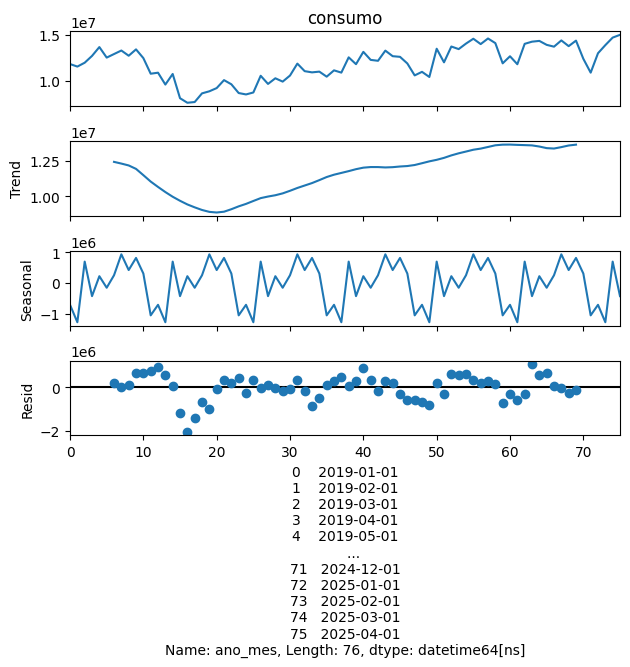

In [33]:
# Decomposição de tendência e sazonalidade

decomp = seasonal_decompose(mmm_marinha.consumo, model='additive', period=12)
decomp.plot()
plt.show()

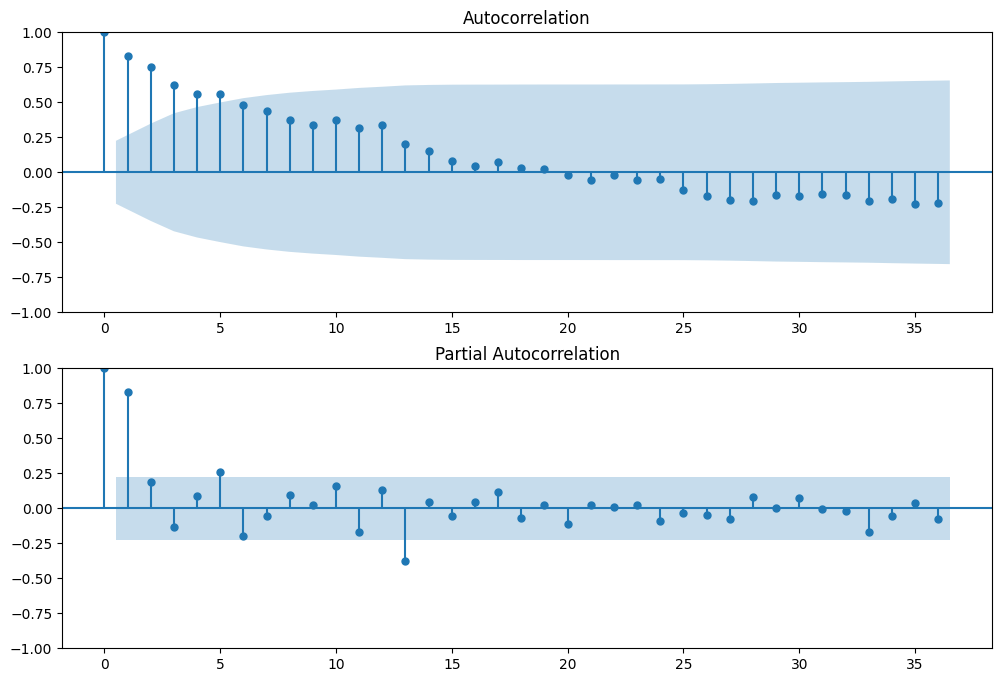

In [34]:
# Análise de autocorrelação

fig, ax = plt.subplots(2,1, figsize=(12,8))
plot_acf(mmm_marinha.consumo.dropna(), lags=36, ax=ax[0])
plot_pacf(mmm_marinha.consumo.dropna(), lags=36, ax=ax[1], method='ywm')
plt.show()

In [35]:
autocorr_values = pd.DataFrame({i:[mmm_marinha.consumo.autocorr(lag=i)] for i in range(1, 50)}).T

autocorr_values[abs(autocorr_values[0]) >= 0.3]

,0
1,0.848015
2,0.777554
3,0.652334
4,0.588264
5,0.590750
6,0.510175
7,0.467528
8,0.406853
9,0.371905
10,0.412612


### Teste de modelos

#### Previsão Naïve (critério de comparação)

In [36]:
naive_forecast = mmm_marinha.consumo.shift(1)
mae_naive = mean_absolute_error(mmm_marinha.consumo.iloc[1:], naive_forecast.iloc[1:])
print('Baseline Naïve MAE:', mae_naive)

Baseline Naïve MAE: 825468.93127114


#### Previsão SARIMA (critério de comparação)

In [37]:
train = mmm_marinha.iloc[:-12, :]
test = mmm_marinha.iloc[-12:, :]

In [38]:
# sarima_model = SARIMAX(train.totais_balanco_paiol_despesa,
#                        order=model_auto.order,
#                        seasonal_order=model_auto.seasonal_order)

# sarima_fit = sarima_model.fit(disp=False)

# forecast_sarima = sarima_fit.get_forecast(steps=12)
# pred_sarima = forecast_sarima.predicted_mean

# mae_sarima = mean_absolute_error(test.totais_balanco_paiol_despesa, pred_sarima)
# print('SARIMA MAE:', mae_sarima)



In [39]:
# fig = grafico_base('Previsão temporal com o algoritmo SARIMA')

# fig.add_trace(
#     go.Scatter(
#         x = test.mes,
#         y = pred_sarima
#     )
# )

# fig.update_traces(mode='lines+markers', line=dict(width=2))
# fig.update_xaxes(tickangle=45)
# fig.update_layout(
#     template='plotly_white',
#     hovermode='x unified'
#     )

# fig.show()

#### Exponential Smoothing (critério de comparação)

In [77]:
# Configurações do modelo Holt-Winters
hw_config = {
    "trend": "add",          # tendência aditiva
    "seasonal": "add",       # sazonalidade aditiva
    "seasonal_periods": 12   # sazonalidade anual (12 meses, se dados forem mensais)
}

# Instancia e ajusta o modelo
hw_model = ExponentialSmoothing(
    train['consumo'],
    **hw_config
).fit(
    optimized=True,          # busca automática dos melhores parâmetros de suavização
    use_brute=True           # garante exploração mais ampla dos parâmetros
)

# Geração de previsões para o horizonte definido
forecast_horizon = 12
pred_hw = hw_model.forecast(steps=forecast_horizon)

# Avaliação rápida
print(f'Previsão gerada para {forecast_horizon} períodos à frente.')
print(f'Holt-Winters MAE: {mean_absolute_error(test['consumo'], pred_hw)}')

Previsão gerada para 12 períodos à frente.
MAE: 1584814.6959127618


In [43]:
fig = plota_resultados(
    df=mmm_marinha,
    x_col="ano_mes",
    y_col="consumo",
    title="Previsão temporal — ExponentialSmoothing",
    preds={
        "ExponentialSmoothing": (test.ano_mes, pred_hw)
    }
)
fig.show()


#### Prophet

DEBUG:cmdstanpy:input tempfile: /tmp/tmpodlm654c/fkca6_oz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpodlm654c/qs1m0kid.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14247', 'data', 'file=/tmp/tmpodlm654c/fkca6_oz.json', 'init=/tmp/tmpodlm654c/qs1m0kid.json', 'output', 'file=/tmp/tmpodlm654c/prophet_model48_dtzlb/prophet_model-20250926030431.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:04:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:04:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet — MAE: 692236.39 | RMSE: 684402559607.85


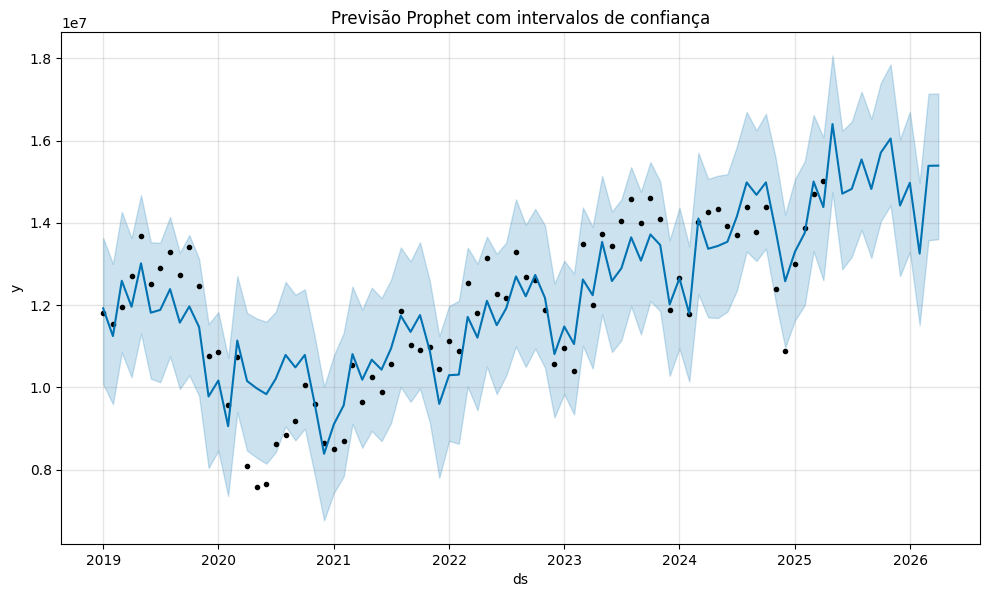

In [81]:
prophet_df = (
    mmm_marinha[['ano_mes', 'consumo']]
    .rename(columns={'ano_mes': 'ds', 'consumo': 'y'})
    .assign(ds=lambda d: pd.to_datetime(d['ds'], format='%m_%Y'))
    .sort_values('ds')
    .reset_index(drop=True)
)

model_prophet = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode="additive",
    interval_width=0.95
)

model_prophet.fit(prophet_df)

forecast_horizon = 12  # meses à frente
future = model_prophet.make_future_dataframe(periods=forecast_horizon, freq='M')
forecast = model_prophet.predict(future)

test_dates = pd.to_datetime(test['ano_mes'], format='%m_%Y')
forecast_test = forecast.set_index('ds').loc[test_dates]

y_true = test['consumo']
prophet_y_pred = forecast_test['yhat']

mae = mean_absolute_error(y_true, prophet_y_pred)
rmse = mean_squared_error(y_true, prophet_y_pred)

print(f"Prophet — MAE: {mae:.2f} | RMSE: {rmse:.2f}")

fig = model_prophet.plot(forecast)
plt.title("Previsão Prophet com intervalos de confiança")
plt.show()


In [80]:
fig = plota_resultados(
    df=mmm_marinha,
    x_col="ano_mes",
    y_col="consumo",
    title="Previsão temporal — Prophet",
    preds={
        "Prophet": (test.ano_mes, prophet_y_pred)
    }
)
fig.show()

#### XGBoost regressor

In [84]:
xg_df = mmm_marinha[['consumo']]

for lag in [1, 3, 6]:
  xg_df[f'lag{lag}'] = xg_df['consumo'].shift(lag)

for window in [3, 6]:
  xg_df[f'rolling{window}'] = xg_df['consumo'].rolling(window).mean()

xg_df = xg_df.dropna().reset_index(drop=True)

In [85]:
horizon = 12  # número de períodos para teste
train_xg, test_xg = xg_df.iloc[:-horizon], xg_df.iloc[-horizon:]

X_train, y_train = train_xg.drop(columns=["consumo"]), train_xg["consumo"]
X_test, y_test   = test_xg.drop(columns=["consumo"]), test_xg["consumo"]

xgb_params = dict(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,               # usa todos os núcleos disponíveis
    objective="reg:squarederror",  # regressão padrão
    verbosity=0
)

xgb_model = XGBRegressor(**xgb_params)

# Treino
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

pred_xgb = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, pred_xgb)
rmse = mean_squared_error(y_test, pred_xgb)

print(f"XGBoost MAE: {mae:.2f} | RMSE: {rmse:.2f}")



XGBoost → MAE: 504132.99 | RMSE: 481184613778.55


In [86]:
fig = plota_resultados(
    df=mmm_marinha,
    x_col="ano_mes",
    y_col="consumo",
    title="Previsão temporal — XGBoost",
    preds={
        "XGBoost": (test.ano_mes, pred_xgb)
    }
)
fig.show()

#### LSTM

In [118]:
scaler = MinMaxScaler(feature_range=(0, 1))
despesas_scaled = scaler.fit_transform(mmm_marinha.consumo.values.reshape(-1, 1))

def create_sequences(data, window=12):
    X, y = [], []
    for i in range(len(data)- window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

X, y = create_sequences(despesas_scaled)


split = len(X) - 12
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
print('Shape treino:', X_train.shape, y_train.shape)

Shape treino: (52, 12, 1) (52, 1)


In [154]:
model = Sequential([
    LSTM(128, activation='relu', return_sequences=True, input_shape=(12, 1)),
    BatchNormalization(),

    LSTM(64, activation='relu', return_sequences=False),
    BatchNormalization(),

    Dense(32, activation='relu'),

    Dense(32, activation='relu'),

    Dense(16, activation='relu'),

    Dense(1)
])

# Compilação com Adam otimizado
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999),
    loss='mae',
    metrics=['mse']
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=200, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=200, min_lr=1e-5, verbose=1)
]

history = model.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=callbacks,
    verbose=1
)

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 217ms/step - loss: 0.4040 - mse: 0.2170 - val_loss: 0.7938 - val_mse: 0.6519 - learning_rate: 0.0010
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2222 - mse: 0.0742 - val_loss: 0.7795 - val_mse: 0.6293 - learning_rate: 0.0010
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1852 - mse: 0.0577 - val_loss: 0.7747 - val_mse: 0.6219 - learning_rate: 0.0010
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1314 - mse: 0.0254 - val_loss: 0.7614 - val_mse: 0.6015 - learning_rate: 0.0010
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1288 - mse: 0.0243 - val_loss: 0.7541 - val_mse: 0.5903 - learning_rate: 0.0010
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1212 - mse: 0.0239 - val_loss: 0.7469 - val_mse: 0.5796 - learning_rate: 0.0010
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1508 - mse: 0.0361 - val_loss: 0.7393 - val_mse: 0.5684 - learning_rate: 0.0010
Epoch 8/1000

In [155]:
y_pred = model.predict(X_test)

y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

mae_lstm = mean_absolute_error(y_test_inv, y_pred_inv)
print('LSTM MAE:', mae_lstm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step
LSTM MAE: 464690.8149550003


In [157]:
fig = plota_resultados(
    df=mmm_marinha,
    x_col="ano_mes",
    y_col="consumo",
    title="Previsão temporal — LSTM",
    preds={
        "LSTM": (test.ano_mes, y_pred_inv.flatten())
    }
)
fig.show()

#### Multistep LSTM

In [159]:
def create_sequences_multistep(data, window=12, horizon=12):
    X, y = [], []
    for i in range(len(data) - window - horizon + 1):
        X.append(data[i:i+window])
        y.append(data[i+window:i+window+horizon].flatten())
    return np.array(X), np.array(y)

window = 12
horizon = 12
X, y = create_sequences_multistep(despesas_scaled, window, horizon)

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
print('X_train shape:', X_train.shape)
print('y_train, shape:', y_train.shape)

X_train shape: (42, 12, 1)
y_train, shape: (42, 12)


In [173]:
# model = Sequential()
# model.add(LSTM(64, activation="tanh", return_sequences=True, input_shape=(window, 1)))
# model.add(Dropout(0.2))
# model.add(LSTM(32, activation="tanh"))
# model.add(Dense(horizon))  # saída com 12 valores (multi-step)

# model.compile(optimizer="adam", loss="mse")

# history = model.fit(
#     X_train, y_train,
#     epochs=300,
#     batch_size=4,
#     validation_split=0.1,
#     verbose=1
# )

model = Sequential([
    LSTM(128, activation='relu', return_sequences=True, input_shape=(window, 1)),
    # Dropout(0.3),
    BatchNormalization(),

    LSTM(64, activation='relu', return_sequences=False),
    # Dropout(0.3),
    BatchNormalization(),

    Dense(32, activation='relu'),

    Dense(32, activation='relu'),

    Dense(horizon)  # saída multi-step
])

# Compilação
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
    loss="mse",
    metrics=["mae"]
)

# ======================
# Callbacks
# ======================
callbacks = [
    EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=200, min_lr=1e-5, verbose=1)
]

# ======================
# Treinamento
# ======================

history = model.fit(
    X_train, y_train,
    epochs=2000,
    batch_size=16,          # batch maior estabiliza gradiente
    validation_data = (X_test, y_test),
    callbacks=callbacks,
    verbose=1
)

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 331ms/step - loss: 0.3552 - mae: 0.5057 - val_loss: 0.5682 - val_mae: 0.7382 - learning_rate: 0.0100
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1837 - mae: 0.3414 - val_loss: 0.3638 - val_mae: 0.5708 - learning_rate: 0.0100
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1425 - mae: 0.2999 - val_loss: 11.0414 - val_mae: 2.4580 - learning_rate: 0.0100
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0888 - mae: 0.2370 - val_loss: 161.3889 - val_mae: 9.2701 - learning_rate: 0.0100
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0693 - mae: 0.2057 - val_loss: 116.5795 - val_mae: 7.9644 - learning_rate: 0.0100
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0695 - mae: 0.2061 - val_loss: 122.4547 - val_mae: 8.4348 - learning_rate: 0.0100
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0602 - mae: 0.1853 - val_loss: 57.9861 - val_mae: 5.9110 - learning_rate: 0.0100
Epoc

In [180]:
y_pred = model.predict(X_test)

y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

mae_lstm_multi = mean_absolute_error(y_test_inv.flatten(), y_pred_inv.flatten())
print('LSTM Multi-step MAE:', mae_lstm_multi)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
LSTM Multi-step MAE: 1035818.2123676516


In [188]:
fig = plota_resultados(
    df=mmm_marinha,
    x_col="ano_mes",
    y_col="consumo",
    title="Previsão temporal — Multi-step LSTM",
    preds={
        "Multi-step LSTM": (test.ano_mes, y_pred_inv[-1])
    }
)
fig.show()

#### N-Beats

In [204]:
train['item_id'] = 'mnc'
nbeats_data = train.rename(columns={'item_id':'unique_id', 'ano_mes':'ds', 'consumo':'y'})

model = NBEATS(
    h = 12,
    input_size = 36,
    stack_types = ['seasonality', 'identity', 'trend', 'identity'],
    n_blocks = [3, 3, 3, 2],
    activation = 'ReLU',

    learning_rate = 1e-3,
    num_lr_decays = 3,
    batch_size = 16,
    scaler_type = 'robust',


    max_steps = 1000,
    val_check_steps = 10,
    early_stop_patience_steps = 20
)

nbeats_forecast = NeuralForecast(models=[model], freq='M')
nbeats_forecast.fit(df=nbeats_data, val_size=12)
y_pred_nbeats = nbeats_forecast.predict()

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 9.1 M  | train
-------------------------------------------------------
9.1 M     Trainable params
3.6 K     Non-trainable params
9.1 M     Total params
36.319    Total estimated model params size (MB)
103       Modules in train mode
0       

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:lightning.pytorch.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [206]:
y_pred_nbeats

,unique_id,ds,NBEATS
0,mnc,2024-04-30,14301290.0
1,mnc,2024-05-31,14705862.0
2,mnc,2024-06-30,14448974.0
3,mnc,2024-07-31,15360148.0
4,mnc,2024-08-31,14647269.0
5,mnc,2024-09-30,14575402.0
6,mnc,2024-10-31,14438846.0
7,mnc,2024-11-30,14026795.0
8,mnc,2024-12-31,14485898.0
9,mnc,2025-01-31,13943794.0


In [205]:
fig = plota_resultados(
    df=mmm_marinha,
    x_col="ano_mes",
    y_col="consumo",
    title="Previsão temporal — N-Beats",
    preds={
        "N-Beats": (test.ano_mes, y_pred_nbeats.NBEATS.values.flatten())
    }
)
fig.show()

#### Autogluon

In [ ]:
# autogluon_data = TimeSeriesDataFrame(
#     train.rename(columns={'ano_mes':'timestamp', 'consumo':'target'}),
#     id_column='item_id',
#     timestamp_column='timestamp')

# autogluon_forecast = TimeSeriesPredictor(
#     target = 'target',
#     eval_metric = 'MSE',
#     freq='M',
#     prediction_length=12
# ).fit(
#     autogluon_data,
#     presets=['best_quality'],
#     #val_step_size=1,
#     #num_val_windows=1
#     )
# y_pred_autogluon = autogluon_forecast.predict(
#     autogluon_data,
#     num_samples=12
# )

In [ ]:
fig = grafico_base('Previsão temporal com o algoritmo Autogluon')

fig.add_trace(
    go.Scatter(
        x = test.ano_mes,
        y = y_pred_nbeats.NBEATS.values.flatten()
    )
)

fig.update_traces(mode='lines+markers', line=dict(width=2))
fig.update_xaxes(tickangle=45)
fig.update_layout(
    template='plotly_white',
    hovermode='x unified'
    )

fig.show()

### Seleção do melhor modelo

In [ ]:
model = 'LSTM' #@param ["SARIMAX", "prophet", "XGBoost", "ExponentialSmothing", "LSTM"]
test = 'A' #@param

print(f"Selected model: {model}")
print(f'Selected test : {test}')

### Conclusões

## Trabalhos futuros